<h1 style="color: rgb(0, 136, 204);font-family: times;font-size: 40px;"><center>Outlier Analysis</center></h1>

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/data_analyzed.csv")
df.head()

,fiyat,il,ilce,emlak_tipi,m2_brut,m2_net,oda,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo,balkon,esyali,kullanim_durumu,site_icerisinde,krediye_uygun,kimden,takas
0,319000,istanbul,beylikdüzü,daire,120,112,2+1,3,15,18,merkezi,2,yok,hayır,boş,evet,evet,emlak ofisinden,hayır
1,163000,istanbul,esenyurt,daire,115,100,2+1,7,1,4,doğalgaz,1,var,hayır,boş,hayır,evet,emlak ofisinden,evet
2,273000,istanbul,başakşehir,daire,80,70,2+1,2,yüksek giriş,4,doğalgaz,1,yok,hayır,boş,hayır,evet,emlak ofisinden,hayır
3,299000,istanbul,esenyurt,daire,110,90,2+1,4,4,4,doğalgaz,1,var,hayır,boş,hayır,evet,emlak ofisinden,evet
4,469000,istanbul,beylikdüzü,daire,125,115,2+1,2,1,5,doğalgaz,2,var,hayır,boş,hayır,evet,inşaat firmasından,evet


## Elimination Of Missing Values

In [3]:
df.isnull().sum()

fiyat                0
il                   0
ilce                 0
emlak_tipi           0
m2_brut              0
m2_net               0
oda                  0
bina_yasi            0
bulundugu_kat        0
kat_sayisi           0
isitma               0
banyo                0
balkon               0
esyali               0
kullanim_durumu      0
site_icerisinde    581
krediye_uygun        0
kimden               0
takas                0
dtype: int64

In [4]:
df.site_icerisinde.value_counts()

hayır            4397
evet             1448
belirtilmemiş     405
Name: site_icerisinde, dtype: int64

In [5]:
df.site_icerisinde.fillna("hayır",inplace=True)
#Missing values were filled with the most repeated values.

In [6]:
df.site_icerisinde.isnull().sum()

0

## Data Editing

* hayır : No
* evet : Yes
* belirtilmemiş : not specified

Since users do not want to specify some features while posting an advertisement on the site, a data type called "belirtilmemiş" has been created. This data has been replaced with the most repeating value in the categorical variable it contains.

In [7]:
df.esyali.value_counts()

hayır            6075
evet              486
belirtilmemiş     270
Name: esyali, dtype: int64

In [8]:
df.loc[df.esyali == "belirtilmemiş", "esyali"] = "hayır"

In [9]:
df.krediye_uygun.value_counts()

evet             6017
hayır             578
belirtilmemiş     236
Name: krediye_uygun, dtype: int64

In [10]:
df.loc[df.krediye_uygun == "belirtilmemiş", "krediye_uygun"] = "evet"

In [11]:
df.site_icerisinde.value_counts()

hayır            4978
evet             1448
belirtilmemiş     405
Name: site_icerisinde, dtype: int64

In [12]:
df.loc[df.site_icerisinde == "belirtilmemiş", "site_icerisinde"] = "evet"

## Outlier Detection

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyat,6831.0,524715.409750,588078.525883,50400.0,285000.0,399000.0,590000.0,18000000.0
m2_brut,6831.0,152.021666,67.326560,36.0,110.0,145.0,180.0,1600.0
m2_net,6831.0,132.099400,55.647975,22.0,98.5,125.0,155.0,1600.0
bina_yasi,6831.0,6.808666,8.244053,0.0,0.0,4.0,7.0,31.0
kat_sayisi,6831.0,6.614405,4.088593,1.0,4.0,5.0,8.0,30.0
banyo,6831.0,1.481774,0.563336,1.0,1.0,1.0,2.0,5.0


In [14]:
q1_price = df["fiyat"].quantile(0.25)
q3_price = df["fiyat"].quantile(0.75)

iqr_price = q3_price - q1_price

minim = q1_price - (1.5*iqr_price)
maxim = q3_price + (1.5*iqr_price)

print("Minimum Outlier Value:",minim)
print("Maximum Outlier Value:",maxim)

data = df[(df.fiyat > maxim)].index
df.drop(data, axis=0, inplace=True)

Minimum Outlier Value: -172500.0
Maximum Outlier Value: 1047500.0


In [15]:
q1 = df["m2_brut"].quantile(0.25)
q3 = df["m2_brut"].quantile(0.75)

iqr = q3 - q1

minim = q1 - (1.5*iqr)
maxim = q3 + (1.5*iqr)

print("Minimum Outlier Value:",minim)
print("Maximum Outlier Value:",maxim)

data = df[(df.m2_brut > maxim) | (df.m2_brut < np.abs(minim))].index
df.drop(data, axis=0, inplace=True)

Minimum Outlier Value: 12.5
Maximum Outlier Value: 272.5


In [16]:
q1 = df["m2_net"].quantile(0.25)
q3 = df["m2_net"].quantile(0.75)

iqr = q3 - q1

minim = q1 - (1.5*iqr)
maxim = q3 + (1.5*iqr)

print("Minimum Outlier Value:",minim)
print("Maximum Outlier Value:",maxim)

data = df[(df.m2_net > maxim) | (df.m2_net < minim)].index
df.drop(data, axis=0, inplace=True)

Minimum Outlier Value: 12.5
Maximum Outlier Value: 232.5


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyat,6207.0,416242.429032,193171.570450,50400.0,275000.0,375000.0,530000.0,1040000.0
m2_brut,6207.0,142.487997,43.147793,36.0,110.0,140.0,175.0,270.0
m2_net,6207.0,124.653295,38.030772,22.0,95.0,125.0,150.0,230.0
bina_yasi,6207.0,6.843886,8.285372,0.0,0.0,4.0,10.0,31.0
kat_sayisi,6207.0,6.446915,3.764803,1.0,4.0,5.0,8.0,30.0
banyo,6207.0,1.418237,0.512533,1.0,1.0,1.0,2.0,4.0


After removing the outliers from the data set, we notice a noticeable decrease when we examine the statistical standard deviations of the numerical values in the data set.

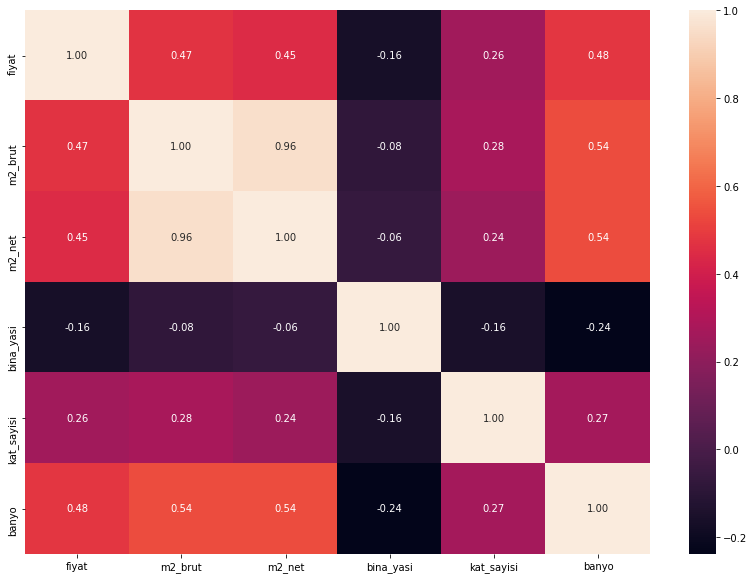

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [19]:
df.to_csv(r"Datasets/data_analyzed.csv",encoding="utf-8",index=False,mode="w")